# Lesson 6: Exercises

## Load CADETSettings

This imports all the standard libraries and provides some helper functions.

In [1]:
%run ../utils.ipynb

/home/jo/software/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jo/software/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jo/software/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jo/software/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jo/software/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: nump

## Model templates

In [2]:
def get_langmuir_template():
    n_comp = 2
    
    langmuir_model = get_cadet_template(n_units=4)

    # INLET
    langmuir_model.root.input.model.unit_000.unit_type = 'INLET'
    langmuir_model.root.input.model.unit_000.ncomp = n_comp
    langmuir_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

    # Mixer
    langmuir_model.root.input.model.unit_001.unit_type = 'CSTR'
    langmuir_model.root.input.model.unit_001.ncomp = n_comp
    langmuir_model.root.input.model.unit_001.init_volume =1e-6
    langmuir_model.root.input.model.unit_001.init_c = n_comp*[0.0]

    # Column
    langmuir_model.root.input.model.unit_002.unit_type = 'LUMPED_RATE_MODEL_WITH_PORES'
    langmuir_model.root.input.model.unit_002.ncomp = n_comp

    langmuir_model.root.input.model.unit_002.col_length = 0.6
    langmuir_model.root.input.model.unit_002.cross_section_area = 1.0386890710931253E-4
    langmuir_model.root.input.model.unit_002.col_porosity = 0.37
    langmuir_model.root.input.model.unit_002.par_porosity = 0.33
    langmuir_model.root.input.model.unit_002.par_radius = 4.5e-5

    langmuir_model.root.input.model.unit_002.col_dispersion = 2.0e-7
    langmuir_model.root.input.model.unit_002.film_diffusion = [1e-4, 1e-4]

    langmuir_model.root.input.model.unit_002.adsorption_model = 'MULTI_COMPONENT_LANGMUIR'
    langmuir_model.root.input.model.unit_002.adsorption.is_kinetic = False
    langmuir_model.root.input.model.unit_002.adsorption.mcl_ka = [2, 3]
    langmuir_model.root.input.model.unit_002.adsorption.mcl_kd = [1, 1]
    langmuir_model.root.input.model.unit_002.adsorption.mcl_qmax = [1, 1]

    langmuir_model.root.input.model.unit_002.init_c = n_comp*[0.0,]
    langmuir_model.root.input.model.unit_002.init_q = n_comp*[0.0,]

    ## Outlet
    langmuir_model.root.input.model.unit_003.ncomp = n_comp
    langmuir_model.root.input.model.unit_003.unit_type = 'OUTLET'

    set_discretization(langmuir_model, n_col=40, n_bound=n_comp*[1])
    
    return langmuir_model

def get_clr_template():
    clr_model = get_cadet_template(n_units=5)

    # INLET
    clr_model.root.input.model.unit_000.unit_type = 'INLET'
    clr_model.root.input.model.unit_000.ncomp = n_comp
    clr_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

    # Column
    clr_model.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
    clr_model.root.input.model.unit_001.ncomp = n_comp

    clr_model.root.input.model.unit_001.col_length = 0.6
    clr_model.root.input.model.unit_001.cross_section_area = 1.0386890710931253E-4
    clr_model.root.input.model.unit_001.total_porosity = 0.6
    clr_model.root.input.model.unit_001.col_dispersion = 2.0e-7

    clr_model.root.input.model.unit_001.adsorption_model = 'MULTI_COMPONENT_LANGMUIR'
    clr_model.root.input.model.unit_001.adsorption.is_kinetic = False
    clr_model.root.input.model.unit_001.adsorption.mcl_ka = [2, 2.2]
    clr_model.root.input.model.unit_001.adsorption.mcl_kd = [1, 1]
    clr_model.root.input.model.unit_001.adsorption.mcl_qmax = [1, 1]

    clr_model.root.input.model.unit_001.init_c = n_comp*[0.0,]
    clr_model.root.input.model.unit_001.init_q = n_comp*[0.0,]

    ## Outlet
    clr_model.root.input.model.unit_002.ncomp = n_comp
    clr_model.root.input.model.unit_002.unit_type = 'OUTLET'

    set_discretization(clr_model, n_col=40, n_bound=n_comp*[1])
    
    return clr_model

## Exercise 1: Modelling dispersion of valves and tubing

Take the example from the lesson and add tubing using a `LUMPED_RATE_MODEL_WITHOUT_PORES` with $L_c = 0.5~m$, $A_c = 1 \cdot 10^{-5}~m^2$, and $D_{ax} = 1 \cdot 10^{-5}~m^2 \cdot s^{-1}$.

***Task:*** Plot the inlet and outlet of every unit operation and compare the results to a system without any considerations for valving and tubing.

***Hint:*** We can define unit operations in any order, so you can simply add to the template and then set the connections accordingly.
Make sure to also the discretization for the tubing and to set the flags for saving the solution.

Simulation completed successfully


Text(0, 0.5, '$concentration~/~mM$')

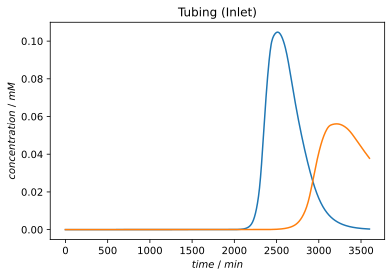

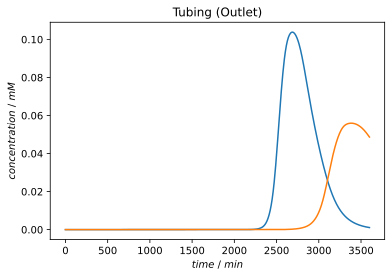

In [3]:
langmuir_model = get_langmuir_template()
langmuir_model.root.input.model.nunits = 5

n_comp = 2
t_cycle = 3600

## Tubing
langmuir_model.root.input.model.unit_004.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
langmuir_model.root.input.model.unit_004.ncomp = n_comp
langmuir_model.root.input.model.unit_004.col_length = 0.5
langmuir_model.root.input.model.unit_004.cross_section_area = 1.0386890710931253E-5
langmuir_model.root.input.model.unit_004.total_porosity = 1.0
langmuir_model.root.input.model.unit_004.col_dispersion = 2.0e-5

langmuir_model.root.input.model.unit_004.adsorption_model = 'NONE'

langmuir_model.root.input.model.unit_004.init_c = n_comp*[0.0,]
langmuir_model.root.input.model.unit_004.init_q = n_comp*[0.0,]

set_discretization(langmuir_model, n_col=40, n_bound=n_comp*[1])
langmuir_model.root.input['return'].unit_004 = langmuir_model.root.input['return'].unit_003



## Sections and Connections
langmuir_model.root.input.solver.sections.nsec = 2
langmuir_model.root.input.solver.sections.section_times = [0.0, 50.0, t_cycle]
langmuir_model.root.input.solver.sections.section_continuity = [0,]

## Inlet Profile
langmuir_model.root.input.model.unit_000.sec_000.const_coeff = n_comp*[1.0,]
langmuir_model.root.input.model.unit_000.sec_001.const_coeff = n_comp*[0.0,]

## Switches
langmuir_model.root.input.model.connections.nswitches = 1
langmuir_model.root.input.model.connections.switch_000.section = 0
langmuir_model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, 2.88e-8,
    1, 2, -1, -1, 2.88e-8,
    2, 4, -1, -1, 2.88e-8,
    4, 3, -1, -1, 2.88e-8,
]

# set the times that the simulator writes out data for
langmuir_model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 601)

run_simulation(langmuir_model)

time = langmuir_model.root.output.solution.solution_times
c = langmuir_model.root.output.solution.unit_004.solution_inlet
plt.figure()
plt.plot(time, c)
plt.title('Tubing (Inlet)')
plt.xlabel('$time~/~min$')
plt.ylabel('$concentration~/~mM$')

time = langmuir_model.root.output.solution.solution_times
c = langmuir_model.root.output.solution.unit_004.solution_outlet
plt.figure()
plt.plot(time, c)
plt.title('Tubing (Outlet)')
plt.xlabel('$time~/~min$')
plt.ylabel('$concentration~/~mM$')

## Example 2: Closed loop recycling

For difficult separations, a longer column length can be simulated by recycling the same sample several times through a column.
In `CADET`, we can model this process (called closed loop recycling (CLR)), by connecting a column unit operation with itself.

***Task:*** Use the `clr_model` template and model the CLR process.
First inject some amount on the column.
Then connect the column with itself and consider 5 recycles, each taking $3600~s$. 
Then wash the column for another cycle.

Simulation completed successfully


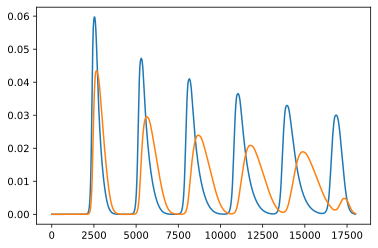

In [5]:
n_comp = 2
t_inj = 20
t_cycle = 3600
t_wash = 3600
n_cycles = 4

clr_model = get_clr_template()

## Sections and Connections
clr_model.root.input.solver.sections.nsec = 3
clr_model.root.input.solver.sections.section_times = [0.0, t_inj, (n_cycles)*t_cycle, n_cycles*t_cycle+t_wash]
clr_model.root.input.solver.sections.section_continuity = [0,0]

## Inlet Profile
clr_model.root.input.model.unit_000.sec_000.const_coeff = n_comp*[1.0,]
clr_model.root.input.model.unit_000.sec_001.const_coeff = n_comp*[0.0,]
clr_model.root.input.model.unit_000.sec_002.const_coeff = n_comp*[0.0,]

## Switches
clr_model.root.input.model.connections.nswitches = 3
clr_model.root.input.model.connections.switch_000.section = 0
clr_model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, 2.88e-8,
    1, 2, -1, -1, 2.88e-8,
]
clr_model.root.input.model.connections.switch_001.section = 1
clr_model.root.input.model.connections.switch_001.connections = [
    1, 1, -1, -1, 2.88e-8,
]
clr_model.root.input.model.connections.switch_002.section = 2
clr_model.root.input.model.connections.switch_002.connections = [
    0, 1, -1, -1, 2.88e-8,
    1, 2, -1, -1, 2.88e-8,
]

# set the times that the simulator writes out data for
clr_model.root.input.solver.user_solution_times = np.linspace(0, n_cycles*t_cycle+t_wash, 601)

run_simulation(clr_model)

time = clr_model.root.output.solution.solution_times
c = clr_model.root.output.solution.unit_001.solution_outlet

plt.plot(time, c)